In [17]:
import pandas as pd
import numpy as np
import scipy as scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'lines.linewidth': 2,
      'axes.labelsize': 18,
      'axes.titlesize': 18,
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("darkgrid")

In [2]:
names_cols = ['id',
 'gender',
 'age',
 'age_higher_than_60',
 'rt_pcr_result',
 'crp_admission',
 'inr_admission',
 'pt_admission',
 'fibrinogen_admission',
 'chest_ct_admission',
 'platalet_count_admission',
 'chest_ct_1_week',
 'crp_1_week',
 'platalet_count_1_week']

index_cols = list(range(5)) + list(range(8,17))

icu = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - ICU-transferred patients.csv",
                     usecols=index_cols, names=names_cols, index_col=0, header=0, decimal=",")
icu["icu"] = 1

icu.head(3)

,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
id,,,,,,,,,,,,,,
ICU01,1,37,0,1,133.0,NaN,NaN,NaN,40.0,141,80.0,131.0,376.0,1
ICU02,0,48,0,1,155.0,NaN,NaN,NaN,72.0,238,NaN,135.0,NaN,1
ICU03,0,40,0,1,191.0,1.26,13.7,5.1,50.0,160,92.0,NaN,NaN,1


In [3]:
stable = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - Stable patients.csv",
                     names=names_cols, index_col=0, header=0, decimal=",")
stable["icu"] = 0
stable.head()

,id,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
STP01,1,70,1,1,7.0,112.0,1.10,12.0,5.46,161,40.0,7.0,28.0,407.0,0
STP02,1,46,0,1,10.0,72.0,1.39,15.1,5.00,306,35.0,12.0,28.0,431.0,0
STP03,1,94,1,1,3.0,84.0,1.08,11.8,2.98,199,75.0,20.0,25.0,251.0,0
STP04,1,74,1,1,11.0,69.0,NaN,NaN,NaN,97,40.0,90.0,44.0,316.0,0
STP05,1,53,0,1,8.0,135.0,1.43,15.5,6.87,302,40.0,135.0,NaN,308.0,0


In [4]:
df = pd.concat([icu, stable], axis=0)
df.head()

,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu,id
ICU01,1,37,0,1.0,133.0,NaN,NaN,NaN,40.0,141.0,80.0,131.0,376.0,1,NaN
ICU02,0,48,0,1.0,155.0,NaN,NaN,NaN,72.0,238.0,NaN,135.0,NaN,1,NaN
ICU03,0,40,0,1.0,191.0,1.26,13.7,5.1,50.0,160.0,92.0,NaN,NaN,1,NaN
ICU04,1,75,1,1.0,182.0,1.32,14.3,5.2,30.0,356.0,72.0,207.0,142.0,1,NaN
ICU05,1,59,0,1.0,166.0,NaN,NaN,5.3,55.0,267.0,92.0,280.0,30.0,1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, ICU01 to STP131
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    231 non-null    int64  
 1   age                       231 non-null    int64  
 2   age_higher_than_60        231 non-null    int64  
 3   rt_pcr_result             228 non-null    float64
 4   crp_admission             225 non-null    float64
 5   inr_admission             208 non-null    float64
 6   pt_admission              208 non-null    float64
 7   fibrinogen_admission      181 non-null    float64
 8   chest_ct_admission        219 non-null    float64
 9   platalet_count_admission  210 non-null    float64
 10  chest_ct_1_week           180 non-null    float64
 11  crp_1_week                178 non-null    float64
 12  platalet_count_1_week     175 non-null    float64
 13  icu                       231 non-null    int64  
 14  id      

In [6]:
df.columns

Index(['gender', 'age', 'age_higher_than_60', 'rt_pcr_result', 'crp_admission',
       'inr_admission', 'pt_admission', 'fibrinogen_admission',
       'chest_ct_admission', 'platalet_count_admission', 'chest_ct_1_week',
       'crp_1_week', 'platalet_count_1_week', 'icu', 'id'],
      dtype='object')

In [50]:
def non_parametric_bootstrap(df, column, nsim=1000, central_measure=np.mean):
    statistic = []
    for i in range(nsim):
        statistic.append(central_measure(df.sample(20)[column]))
    return np.array(statistic)

/home/rafa/miniconda3/envs/covid_ic/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rafa/miniconda3/envs/covid_ic/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


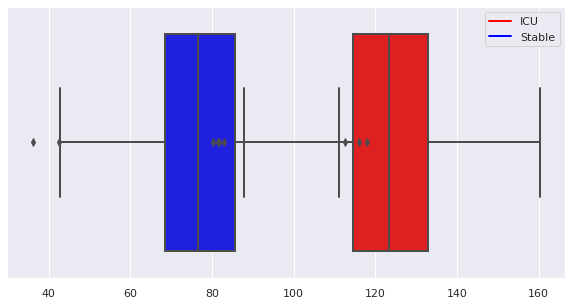

In [63]:
mean_crp_stable = non_parametric_bootstrap(stable, "crp_admission")
mean_crp_icu = non_parametric_bootstrap(icu, "crp_admission")

plt.figure(figsize=(10, 5))
sns.boxplot(mean_crp_icu, color="r")
sns.boxplot(mean_crp_stable, color="b")
plt.legend(labels=["ICU", "Stable"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('r')
leg.legendHandles[1].set_color('b')

/home/rafa/miniconda3/envs/covid_ic/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rafa/miniconda3/envs/covid_ic/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


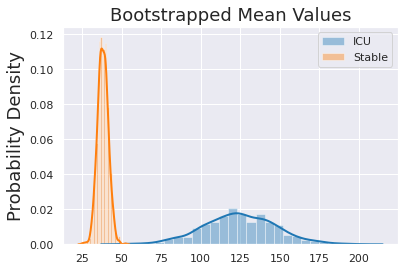

In [57]:
sns.distplot(mean_crp_icu, label='ICU')
sns.distplot(mean_crp_stable, label='Stable')
# plt.gca().axvline(logp.mean(), ls='--', color='k', label='mean pval')
# plt.gca().axvline(-np.log(0.05)/np.log(10), ls='--', color='r', label='statistical significance')
# plt.xlabel('$-\log_{10}{p}$')
plt.ylabel('Probability Density')
plt.title('Bootstrapped Mean Values')
plt.legend()

In [67]:
message = "Mean = {0:.3g}; CI = [{1:.3g}, {2:.3g}]"
icu_percentis = np.percentile(mean_crp_icu, [2.5, 97.5])
icu_mean = np.median(mean_crp_icu)
message.format(icu_mean, *icu_percentis)

'Mean = 123; CI = [97.3, 149]'

In [62]:
stable_percentis = np.percentile(mean_crp_stable, [5, 95])
stable_mean = mean_crp_icu.mean()
message.format(stable_mean, *stable_percentis)

'Mean = 1.2e+02; CI = [58, 99]'